<a href="https://colab.research.google.com/github/hamzaskhan/A-Framework-for-Reverse-Vector-Dynamics-in-a-Dimensionless-Hilbert-Space-Exploring-the-Origins/blob/main/docs/start/start.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2022 The Cirq Developers

In [ ]:
# @title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Hello Qubit

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://quantumai.google/cirq/start/start"><img src="https://quantumai.google/site-assets/images/buttons/quantumai_logo_1x.png" />View on QuantumAI</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/quantumlib/Cirq/blob/main/docs/start/start.ipynb"><img src="https://quantumai.google/site-assets/images/buttons/colab_logo_1x.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/quantumlib/Cirq/blob/main/docs/start/start.ipynb"><img src="https://quantumai.google/site-assets/images/buttons/github_logo_1x.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/Cirq/docs/start/start.ipynb"><img src="https://quantumai.google/site-assets/images/buttons/download_icon_1x.png" />Download notebook</a>
  </td>
</table>

In [1]:
try:
    import cirq
except ImportError:
    print("installing cirq...")
    !pip install --quiet cirq
    import cirq

    print("installed cirq.")

installing cirq...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 kB 952.1 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.7/532.7 kB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.5/60.5 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.3/69.3 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 596.5/596.5 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.8/202.8 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 53.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 33.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 41.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 39.2 MB/s eta 0:00

In [2]:
import cirq
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import logm

# Initialize qubits and circuit
num_qubits = 5  # Number of qubits
qubits = [cirq.LineQubit(i) for i in range(num_qubits)]
circuit = cirq.Circuit()

# Initialize with Hadamard gate to create superposition
for qubit in qubits:
    circuit.append(cirq.H(qubit))

# Print the initial circuit
print("Initial Circuit:\n", circuit)


Initial Circuit:
 0: ───H───

1: ───H───

2: ───H───

3: ───H───

4: ───H───


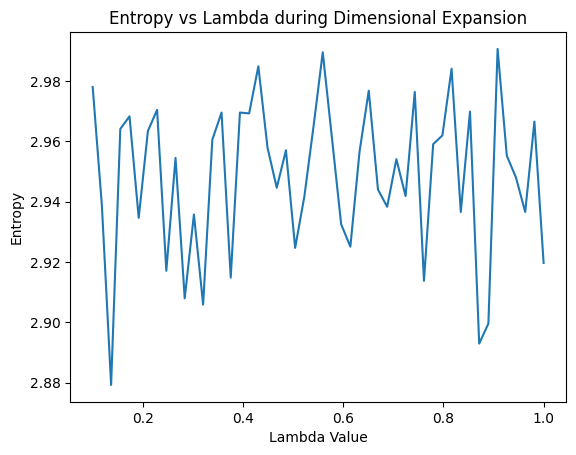

In [3]:
import cirq
import numpy as np

# Define the entropy computation function before using it
def compute_entropy(result):
    """
    Computes Von Neumann entropy from the measurement results.
    Uses the histogram of measurements to calculate entropy.
    """
    # Get the measurement counts
    counts = result.histogram(key='result')  # Use the 'result' key to access measurement outcomes

    # Normalize the counts to get probabilities
    probabilities = np.array([count / sum(counts.values()) for count in counts.values()])

    # Calculate entropy using the formula: H = -Σ(p * log2(p))
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

# Function for the expansion phase of the system
def expansion_phase(circuit, qubits, lambda_val):
    """
    This function simulates the expansion of dimensions in the system by applying
    CNOT and Rx gates, followed by a measurement to capture the quantum state.
    """
    # Apply CNOT gates as part of dimensional expansion (creating entanglement)
    for i in range(len(qubits)-1):
        circuit.append(cirq.CNOT(qubits[i], qubits[i+1]))  # Creating entanglement

    # Gradually increase Lambda by applying Rx gates to simulate dimensional growth
    for i in range(len(qubits)):
        circuit.append(cirq.rx(lambda_val)(qubits[i]))  # Rotate qubits to simulate dimensional growth

    # Add a measurement to all qubits to capture the quantum state and enable entropy calculation
    circuit.append(cirq.measure(*qubits, key='result'))  # Measure all qubits

# Simulate the expansion phase for increasing Lambda
lambda_vals = np.linspace(0.1, 1.0, 50)  # Lambda range from 0.1 to 1.0
expansion_entropies = []

# List of qubits to simulate on
qubits = [cirq.NamedQubit(f'q{i}') for i in range(3)]  # Example: 3 qubits

for lambda_val in lambda_vals:
    # Copy the initial circuit and apply the expansion phase
    circuit = cirq.Circuit(cirq.H(q) for q in qubits)  # Starting circuit with Hadamard gates for superposition
    circuit_expansion = cirq.Circuit(circuit)  # Copy the initial circuit
    expansion_phase(circuit_expansion, qubits, lambda_val)

    # Simulate the quantum circuit and collect the measurement results
    result = cirq.Simulator().run(circuit_expansion, repetitions=100)

    # Compute entropy from the measurement results
    entropy = compute_entropy(result)

    # Store the entropy for this lambda value
    expansion_entropies.append(entropy)

# Display the results (optional)
import matplotlib.pyplot as plt

plt.plot(lambda_vals, expansion_entropies)
plt.xlabel('Lambda Value')
plt.ylabel('Entropy')
plt.title('Entropy vs Lambda during Dimensional Expansion')
plt.show()


In [5]:
def collapse_phase(circuit, qubits, lambda_val):
    # Apply reverse CNOT gates (reverse of expansion)
    for i in range(len(qubits)-1, 0, -1):
        circuit.append(cirq.CNOT(qubits[i-1], qubits[i]))  # Reverse the CNOT gates

    # Apply reverse rotations to simulate dimensional collapse
    for i in range(len(qubits)):
        circuit.append(cirq.rx(-lambda_val)(qubits[i]))  # Reverse the rotations

    # Add a measurement to all qubits to capture the quantum state and enable entropy calculation
    circuit.append(cirq.measure(*qubits, key='result'))  # Measure all qubits

# Simulate the collapse phase for decreasing Lambda
collapse_entropies = []

for lambda_val in reversed(lambda_vals):
    circuit_collapse = cirq.Circuit(circuit)  # Copy the initial circuit
    collapse_phase(circuit_collapse, qubits, lambda_val)

    # Simulate the quantum circuit and collect the measurement results
    result = cirq.Simulator().run(circuit_collapse, repetitions=100)

    # Compute entropy from the measurement results
    entropy = compute_entropy(result)

    # Store the entropy for this lambda value
    collapse_entropies.append(entropy)


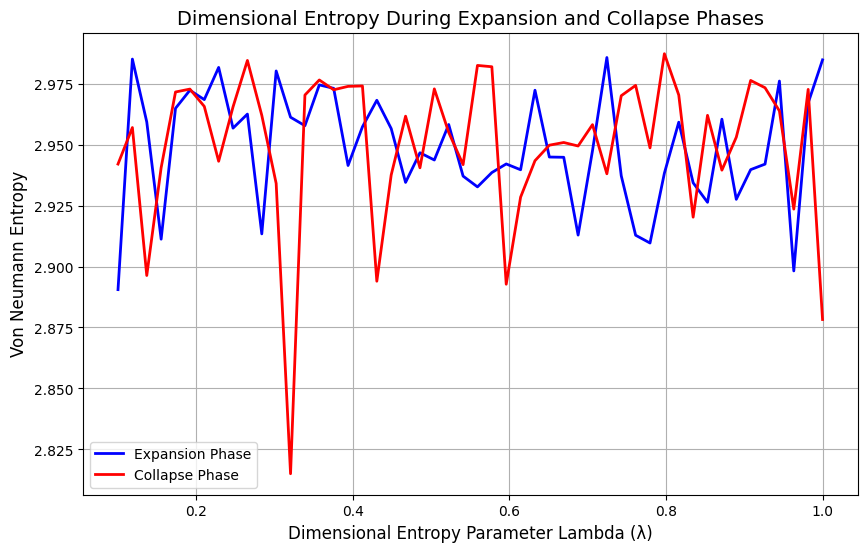

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming expansion_entropies and collapse_entropies are already populated from previous steps

# Lambda values used in the simulation
lambda_vals_expansion = np.linspace(0.1, 1.0, 50)  # Lambda values for expansion phase
lambda_vals_collapse = np.linspace(1.0, 0.1, 50)  # Lambda values for collapse phase (reverse order)

# Create a plot
plt.figure(figsize=(10, 6))

# Plot entropy during the expansion phase
plt.plot(lambda_vals_expansion, expansion_entropies, label="Expansion Phase", color='blue', linewidth=2)

# Plot entropy during the collapse phase
plt.plot(lambda_vals_collapse, collapse_entropies, label="Collapse Phase", color='red', linewidth=2)

# Add titles and labels
plt.title('Dimensional Entropy During Expansion and Collapse Phases', fontsize=14)
plt.xlabel('Dimensional Entropy Parameter Lambda (λ)', fontsize=12)
plt.ylabel('Von Neumann Entropy', fontsize=12)

# Add a grid for better readability
plt.grid(True)

# Add a legend
plt.legend()

# Show the plot
plt.show()


# Congratulations
You've just run your first Cirq program.

To learn about running a circuit on a virtual machine that mimics existing quantum hardware, see [Quantum Virtual Machine](../simulate/quantum_virtual_machine.ipynb).

If you would like to learn more about quantum computing, check out our [education page](https://quantumai.google/resources). The Full API reference for Cirq can be found [here](/reference/python/cirq). If you are looking for vendor specific information that can be found on our vendor sub-pages:


  [Alpine Quantum Technologies](../hardware/aqt/getting_started.ipynb)
  
  [Pasqal](../hardware/pasqal/getting_started.ipynb)
  
  [IonQ](../hardware/ionq/getting_started.ipynb)
  
  [Azure](../hardware/azure-quantum/getting_started_honeywell.ipynb)
  
  [Rigetti](../hardware/rigetti/getting_started.ipynb)